# Period-Changer Dataset

## Data Exploration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 ## Optimization and Baseline Model Creation
import pandas as pd
from google.colab import drive

# Define the file path in Google Drive
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/period+changer-2/data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows to ensure it has been loaded correctly
data.head()


,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0,-0.0436,0.0409,0.0,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NoChanger
1,0.0213,0,0.1144,-0.0410,0,0.0,0.1231,-0.0316,0.0,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NoChanger
2,0.0018,0,-0.0156,-0.0765,2,0.0,-0.1138,-0.1791,0.0,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NoChanger
3,-0.0251,0,-0.0064,-0.0894,3,0.0,-0.0747,-0.1151,0.0,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NoChanger
4,-0.0094,0,0.0132,-0.1035,0,0.0,-0.0046,-0.0870,0.0,0.1063,...,13.0472,7.0536,0.1785,1.4507,0.0113,2,0.0,-0.0824,0.00,NoChanger


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
missing_columns

,0


In [4]:
print(f"Unique values in the 'class' column: {data['Class'].unique()}")

Unique values in the 'class' column: ['NoChanger' 'Changer']


## Optimization and Baseline Model Creation

In [5]:
# Import required libraries
import pandas as pd
from google.colab import drive
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path in Google Drive
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/period+changer-2/data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Step 2: Remove features with zero variance
selector = VarianceThreshold(threshold=0)
optimized_data = selector.fit_transform(data.drop('Class', axis=1))

# Extract the retained feature names after variance thresholding
retained_columns = data.drop('Class', axis=1).columns[selector.get_support()]

# Print the number of features after variance thresholding
print("Number of features after variance thresholding:", len(retained_columns))

# Step 3: Check for missing values
# Append the 'Class' column back to the optimized dataset
optimized_df = pd.DataFrame(optimized_data, columns=retained_columns)
optimized_df['Class'] = data['Class']

# Step 4: Split the data into training and testing sets
X = optimized_df.drop('Class', axis=1)
y = optimized_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Normalize the data (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train a baseline model (Logistic Regression)
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = log_reg_model.predict(X_test_scaled)
r2_Baseline = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Baseline Accuracy:", r2_Baseline)
print("\nClassification Report:\n", report)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of features after variance thresholding: 1177
Baseline Accuracy: 0.5555555555555556

Classification Report:
               precision    recall  f1-score   support

     Changer       0.25      0.50      0.33         4
   NoChanger       0.80      0.57      0.67        14

    accuracy                           0.56        18
   macro avg       0.53      0.54      0.50        18
weighted avg       0.68      0.56      0.59        18



Confusion Matrix:
 [[2 2]
 [6 8]]


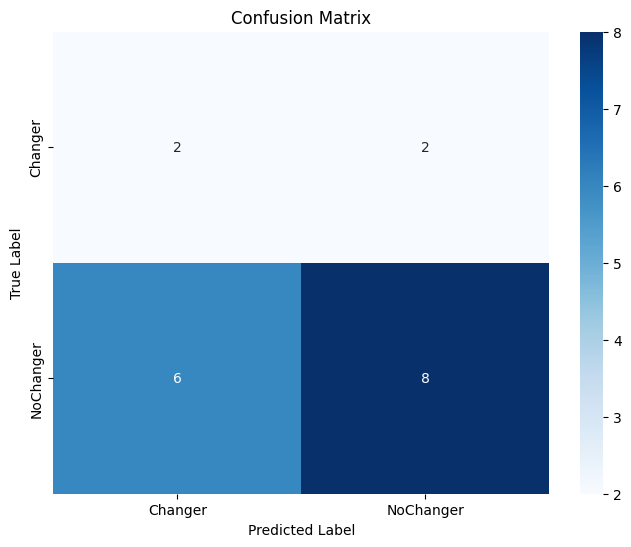

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg_model.classes_, yticklabels=log_reg_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Applying Stochastic Diffusion Search (SDS)

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Extract features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Step 2: Normalize the data (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Define SDS-like feature selection
def stochastic_diffusion_search(X, y, n_agents=10, n_iterations=50, n_features_to_select=20):
    n_samples, n_features = X.shape

    # Initialize agents with random feature sets
    agents = [np.random.choice(range(n_features), n_features_to_select, replace=False) for _ in range(n_agents)]

    best_features = None
    best_accuracy = 0

    for iteration in range(n_iterations):
        for i in range(n_agents):
            # Get subset of features selected by the agent
            selected_features = agents[i]
            X_agent = X[:, selected_features]

            # Train a logistic regression model on these features
            X_train, X_test, y_train, y_test = train_test_split(X_agent, y, test_size=0.2, random_state=42)
            model = LogisticRegression(max_iter=1000, random_state=42)
            model.fit(X_train, y_train)

            # Evaluate accuracy
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # If current agent's features perform better, update best features
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_features = selected_features

            # Stochastic diffusion: randomly select a peer agent and share features
            peer = np.random.choice(range(n_agents))
            if np.random.rand() < 0.7:
                agents[i] = agents[i]  # Keep current agent's features
            else:
                agents[i] = agents[peer]  # Adopt the peer agent's features

        print(f"Iteration {iteration + 1}/{n_iterations} - Best Accuracy: {best_accuracy}")

    return best_features, best_accuracy

# Step 4: Run SDS-based feature selection
best_features, best_accuracy = stochastic_diffusion_search(X_scaled, y, n_agents=10, n_iterations=50, n_features_to_select=20)

# Step 5: Train final model using best features
X_train, X_test, y_train, y_test = train_test_split(X_scaled[:, best_features], y, test_size=0.2, random_state=42)
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_train, y_train)

# Step 6: Evaluate final model
y_pred = final_model.predict(X_test)
SDSfinal_r2_score = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Step 7: Output results
print("\nFinal SDS Model Accuracy:", SDSfinal_r2_score)
print("\nClassification Report:\n", classification_report_output)
print("\nBest Features Selected by SDS:\n", best_features)
print("\nNumber of Features Selected:", len(best_features))


Iteration 1/50 - Best Accuracy: 0.7777777777777778
Iteration 2/50 - Best Accuracy: 0.7777777777777778
Iteration 3/50 - Best Accuracy: 0.7777777777777778
Iteration 4/50 - Best Accuracy: 0.7777777777777778
Iteration 5/50 - Best Accuracy: 0.7777777777777778
Iteration 6/50 - Best Accuracy: 0.7777777777777778
Iteration 7/50 - Best Accuracy: 0.7777777777777778
Iteration 8/50 - Best Accuracy: 0.7777777777777778
Iteration 9/50 - Best Accuracy: 0.7777777777777778
Iteration 10/50 - Best Accuracy: 0.7777777777777778
Iteration 11/50 - Best Accuracy: 0.7777777777777778
Iteration 12/50 - Best Accuracy: 0.7777777777777778
Iteration 13/50 - Best Accuracy: 0.7777777777777778
Iteration 14/50 - Best Accuracy: 0.7777777777777778
Iteration 15/50 - Best Accuracy: 0.7777777777777778
Iteration 16/50 - Best Accuracy: 0.7777777777777778
Iteration 17/50 - Best Accuracy: 0.7777777777777778
Iteration 18/50 - Best Accuracy: 0.7777777777777778
Iteration 19/50 - Best Accuracy: 0.7777777777777778
Iteration 20/50 - Bes


Confusion Matrix:
 [[ 2  2]
 [ 2 12]]


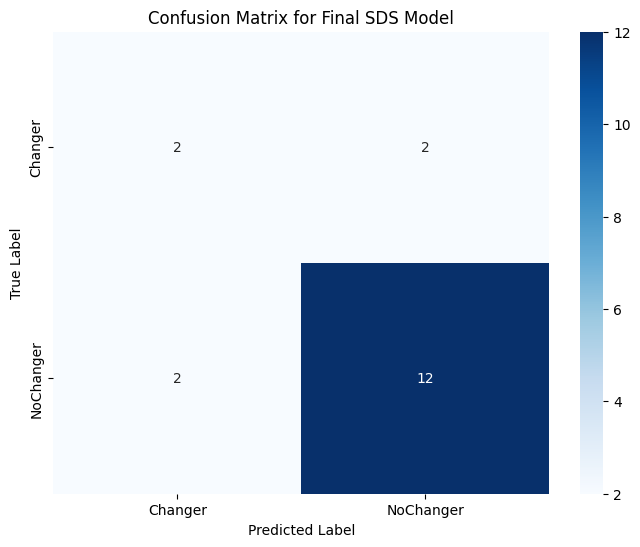

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Final SDS Model')
plt.show()


## Applying Principal Component Analysis (PCA)

In [9]:
# Import required libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Extract features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Step 2: Normalize the data (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA with varying number of components to find the best number
def tune_pca(X, y):
    best_accuracy = 0
    best_n_components = 0
    best_model = None
    best_pca = None

    # Ensure we don't exceed the number of features or samples
    for n_components in range(2, min(X.shape[1], X.shape[0]) + 1):
        pca = PCA(n_components=n_components)
        X_pca = pca.fit_transform(X)

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

        # Train logistic regression with hyperparameter tuning
        log_reg = LogisticRegression(max_iter=1000, random_state=42)
        param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Tuning the regularization strength
        grid_search = GridSearchCV(log_reg, param_grid, cv=5)
        grid_search.fit(X_train, y_train)

        # Evaluate model performance
        y_pred = grid_search.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # If this model has better accuracy, store it
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_components = n_components
            best_model = grid_search.best_estimator_
            best_pca = pca

    return best_model, best_pca, best_n_components, best_accuracy

# Step 4: Tune PCA and logistic regression model
best_model, best_pca, best_n_components, best_accuracy = tune_pca(X_scaled, y)

# Step 5: Final evaluation with the best number of principal components
X_final_pca = best_pca.transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_final_pca, y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
PCAfinal_r2_score = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Step 6: Output results
print(f"\nBest PCA components: {best_n_components}")
print(f"Accuracy after PCA-based feature reduction: {PCAfinal_r2_score}")
print("\nClassification Report:\n", classification_report_output)

# Step 7: Print the explained variance ratio (which indicates the importance of each principal component)
explained_variance = best_pca.explained_variance_ratio_
print("\nExplained Variance by each principal component:\n", explained_variance)

# Step 8: Print the number of principal components (reduced features)
print(f"\nNumber of principal components selected: {best_n_components}")
print(f"\nNumber of features after PCA-based reduction: {len(explained_variance)}")



Best PCA components: 2
Accuracy after PCA-based feature reduction: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

     Changer       1.00      0.25      0.40         4
   NoChanger       0.82      1.00      0.90        14

    accuracy                           0.83        18
   macro avg       0.91      0.62      0.65        18
weighted avg       0.86      0.83      0.79        18


Explained Variance by each principal component:
 [0.15562861 0.12757082]

Number of principal components selected: 2

Number of features after PCA-based reduction: 2



Confusion Matrix:
 [[ 1  3]
 [ 0 14]]


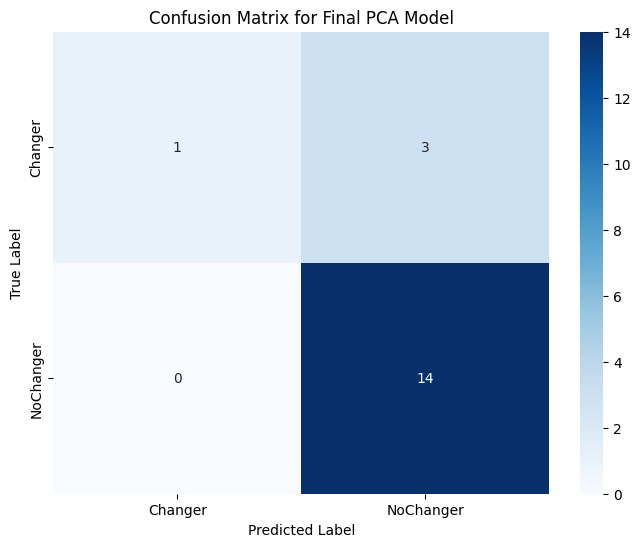

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 9: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Final PCA Model')
plt.show()


## Applying Recursive Feature Elimination (RFE)

In [11]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE

# Extract features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Step 2: Normalize the data (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply RFE to select features
def perform_rfe(X, y):
    model = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)  # Increased max_iter and changed solver

    # Initialize RFE with logistic regression
    rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features (adjust as needed)
    rfe.fit(X, y)

    # Get the selected features
    selected_features = X.columns[rfe.support_]

    return selected_features

# Step 4: Perform RFE
selected_features = perform_rfe(X, y)

# Step 5: Prepare the final dataset with selected features
X_selected = X[selected_features]

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 7: Train the logistic regression model
log_reg = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)  # Increased max_iter and changed solver
log_reg.fit(X_train, y_train)

# Step 8: Make predictions and evaluate the model
y_pred = log_reg.predict(X_test)
RFEfinal_r2_score = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Step 9: Output results
print(f"Selected features:\n{selected_features.tolist()}")
print(f"Number of features selected by RFE: {len(selected_features)}")
print(f"Accuracy after feature reduction with RFE: {RFEfinal_r2_score}")
print("\nClassification Report:\n", classification_report_output)


Selected features:
['ATS4m', 'ATS5s', 'SdO', 'ATSC3v', 'ATSC7i', 'ATSC5v', 'ATS0m', 'VR1_Dzp', 'VR1_Dzv', 'VE3_D']
Number of features selected by RFE: 10
Accuracy after feature reduction with RFE: 0.6111111111111112

Classification Report:
               precision    recall  f1-score   support

     Changer       0.29      0.50      0.36         4
   NoChanger       0.82      0.64      0.72        14

    accuracy                           0.61        18
   macro avg       0.55      0.57      0.54        18
weighted avg       0.70      0.61      0.64        18




Confusion Matrix:
 [[2 2]
 [5 9]]


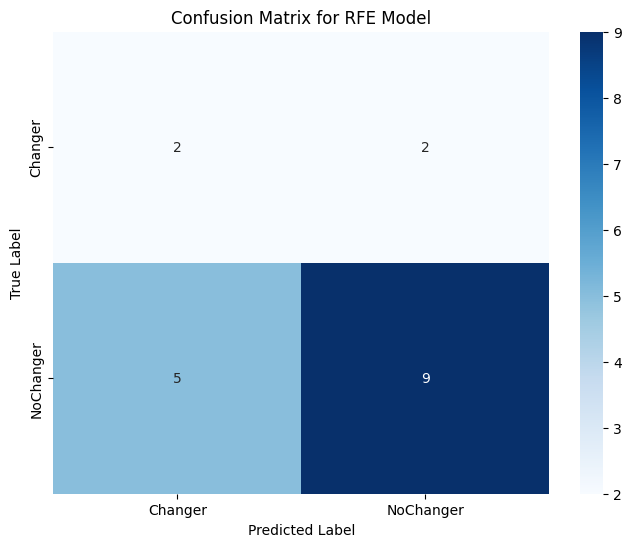

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 10: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for RFE Model')
plt.show()


# Mutual Information Filter method

In [13]:
# Import necessary libraries for filter-based selection
from sklearn.feature_selection import mutual_info_classif

# Step 10: Apply a filter method based on Mutual Information after RFE
def apply_filter_method(X, y, n_features=5):
    mi_scores = mutual_info_classif(X, y, random_state=42)
    feature_indices = mi_scores.argsort()[-n_features:][::-1]  # Select top n_features
    selected_features = X.columns[feature_indices]
    return selected_features

# Perform filter-based selection after RFE
filter_selected_features = apply_filter_method(X[selected_features], y, n_features=5)

# Final dataset with selected features from the filter method
X_filter_selected = X[filter_selected_features]

# Step 11: Split the data for model training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_filter_selected, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate the model performance
y_pred = log_reg.predict(X_test)
filter_r2_score = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Output the results
print(f"Features selected by Filter Method:\n{filter_selected_features.tolist()}")
print(f"Number of features selected by Filter Method: {len(filter_selected_features)}")
print(f"Accuracy after filter-based feature selection: {filter_r2_score}")
print("\nClassification Report:\n", classification_report_output)


Features selected by Filter Method:
['ATSC7i', 'SdO', 'VE3_D', 'VR1_Dzp', 'ATSC5v']
Number of features selected by Filter Method: 5
Accuracy after filter-based feature selection: 0.5

Classification Report:
               precision    recall  f1-score   support

     Changer       0.14      0.25      0.18         4
   NoChanger       0.73      0.57      0.64        14

    accuracy                           0.50        18
   macro avg       0.44      0.41      0.41        18
weighted avg       0.60      0.50      0.54        18




Confusion Matrix:
 [[1 3]
 [6 8]]


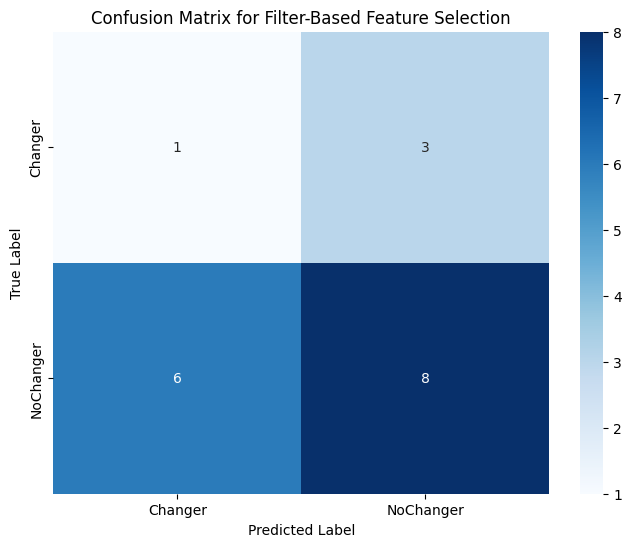

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 12: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("\nConfusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Filter-Based Feature Selection')
plt.show()


## Model Performance Comparison and Visualization of Models

In [15]:
# Baseline model accuracies and features
baseline_r2 = r2_Baseline
baseline_features = len(retained_columns)  # total features before any feature selection

# SDS model accuracies and features
sds_r2 = SDSfinal_r2_score
sds_features = len(best_features)  # directly from the SDS output

# RFE model accuracies and features
rfe_r2 = RFEfinal_r2_score
rfe_features = len(selected_features)  # from the RFECV model after fitting

# PCA model accuracies and features
pca_r2 = PCAfinal_r2_score
pca_features = best_n_components  # number of features after applying PCA

# Compile all the data into a dictionary for easier comparison
model_performances = {
    'Baseline': {'R2 Score': baseline_r2, 'Number of Features': baseline_features},
    'SDS': {'R2 Score': sds_r2, 'Number of Features': sds_features},
    'RFE': {'R2 Score': rfe_r2, 'Number of Features': rfe_features},
    'PCA': {'R2 Score': pca_r2, 'Number of Features': pca_features}
}

# Display the comparison in a formatted way
print("Model Performance Comparison:")
for model_name, metrics in model_performances.items():
    print(f"{model_name} Model: R2 Score = {metrics['R2 Score']:.3f}, Features Used = {metrics['Number of Features']}")

Model Performance Comparison:
Baseline Model: R2 Score = 0.556, Features Used = 1177
SDS Model: R2 Score = 0.778, Features Used = 20
RFE Model: R2 Score = 0.611, Features Used = 10
PCA Model: R2 Score = 0.833, Features Used = 2


In [16]:
# Filter method accuracies and features
filter_r2 = filter_r2_score
filter_features = len(filter_selected_features)

# Add filter method to the performance comparison dictionary
model_performances = {
    'Baseline': {'R2 Score': baseline_r2, 'Number of Features': baseline_features},
    'SDS': {'R2 Score': sds_r2, 'Number of Features': sds_features},
    'RFE': {'R2 Score': rfe_r2, 'Number of Features': rfe_features},
    'PCA': {'R2 Score': pca_r2, 'Number of Features': pca_features},
    'Filter': {'R2 Score': filter_r2, 'Number of Features': filter_features}
}

# Display updated performance comparison
print("Model Performance Comparison:")
for model_name, metrics in model_performances.items():
    print(f"{model_name} Model: Accuracy = {metrics['R2 Score']:.3f}, Features Used = {metrics['Number of Features']}")


Model Performance Comparison:
Baseline Model: Accuracy = 0.556, Features Used = 1177
SDS Model: Accuracy = 0.778, Features Used = 20
RFE Model: Accuracy = 0.611, Features Used = 10
PCA Model: Accuracy = 0.833, Features Used = 2
Filter Model: Accuracy = 0.500, Features Used = 5


In [17]:

import plotly.graph_objects as go

# Assuming the model_performances dictionary is already defined
model_performances = {
    'Baseline': {'R2 Score': baseline_r2, 'Number of Features': baseline_features},
    'SDS': {'R2 Score': sds_r2, 'Number of Features': sds_features},
    'RFE': {'R2 Score': rfe_r2, 'Number of Features': rfe_features},
    'PCA': {'R2 Score': pca_r2, 'Number of Features': pca_features},
    'Filter': {'R2 Score': filter_r2, 'Number of Features': filter_features}
}

# Initialize the Plotly figure
fig = go.Figure()

# Add bar chart for R2 Scores
fig.add_trace(go.Bar(
    x=list(model_performances.keys()),
    y=[data['R2 Score'] for data in model_performances.values()],
    name='Accuracy(%)',
    marker_color=["#FF7F0E", "#1F77B4", "#2CA02C", "#D62728", "#9467BD"]
))

# Add line chart for Number of Features
fig.add_trace(go.Scatter(
    x=list(model_performances.keys()),
    y=[data['Number of Features'] for data in model_performances.values()],
    name='Number of Features',
    yaxis='y2'
))

# Customize layout
fig.update_layout(
    title='Comparison of Model Performances (Updated with Filter Method)',
    xaxis=dict(title='Model'),
    yaxis=dict(title=' Accuracy(%)'),
    yaxis2=dict(title='Number of Features', overlaying='y', side='right'),
    legend=dict(
        x=1.05,  # Position the legend to the right of the plot
        y=1,
        xanchor='left',
        yanchor='top',
        bordercolor="Black",
        borderwidth=1
    )
)

# Show the plot
fig.show()
